## **Industrial Copper: Price prediction using Machine Learning Alogorithms**


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv('C:/Sudhakar/Projects/Industrial Copper Modeling/Dataset & Documents/Copper_Set.csv')
# df = pd.read_csv('Copper_Set.csv')
df.head(2)

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
#checking the unique values of the all columns

for i in df.columns:
  print(i,":",df[i].nunique())

In [ ]:
df.dtypes

In [ ]:
#converting the datatypes
# item_date, delivery date, quantity tons

df["quantity tons"]= pd.to_numeric(df["quantity tons"],errors="coerce")
df["item_date_1"]= pd.to_datetime(df["item_date"],format="%Y%m%d",errors="coerce").dt.date
df["delivery_date_1"]= pd.to_datetime(df["delivery date"],format="%Y%m%d",errors="coerce").dt.date

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.head(2)

In [ ]:
#removing the "00000" datas in the "material_ref" column
df["material_ref"]=df["material_ref"].apply(lambda x: np.nan if str(x).startswith("00000") else x)

In [ ]:
df.head(2)

In [ ]:
df.isnull().sum()

In [ ]:
# "material_ref" have a maximum null values (55%) so, we want to drop the column
# And id is a unique values so we want to drop the column

df.drop(columns=["id","material_ref"],inplace=True)

In [ ]:
df.head(2)

In [ ]:
df.describe().T

In [ ]:
#quantity tons and selling_price have a negative values, This is impossible,
# so we need to replace the negative values

#converting the negative values into the null values
df["quantity tons"]= df["quantity tons"].apply(lambda x: np.nan if x<=0 else x)
df["selling_price"]= df["selling_price"].apply(lambda x: np.nan if x<=0 else x)

In [ ]:
df.isnull().sum()

### Handling the null values using mean(),median() and mode()

In [ ]:
# object columns and mode method
df["item_date_1"].fillna(df["item_date_1"].mode().iloc[0],inplace=True)
df["delivery_date_1"].fillna(df["delivery_date_1"].mode().iloc[0],inplace=True)
df["status"].fillna(df["status"].mode().iloc[0],inplace=True)
df["item_date"]. fillna(df["item_date"].mode().iloc[0],inplace=True)
df["delivery date"]. fillna(df["delivery date"].mode().iloc[0],inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
#numarical column and median()
df["quantity tons"].fillna(df["quantity tons"].median(),inplace=True)
df["customer"].fillna(df["customer"].median(),inplace=True)
df["country"].fillna(df["country"].median(),inplace=True)
df["application"].fillna(df["application"].median(),inplace=True)
df["thickness"].fillna(df["thickness"].median(),inplace=True)
df["selling_price"].fillna(df["selling_price"].median(),inplace=True)

In [ ]:
df.isnull().sum()

### Encoding the catagorical columns

In [ ]:
df.head()

In [ ]:
df['status'].unique()

In [ ]:
df["status"]= df["status"].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
                                'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})

In [ ]:
df["status"].unique()

In [ ]:
df["item type"].unique()

In [ ]:
df["item type"]= OrdinalEncoder().fit_transform(df[["item type"]])

In [ ]:
df["item type"].unique()

In [ ]:
df.describe().T

In [ ]:
# code for Save the dataframe
# df.to_csv("Industrial_Copper_proper_Data.csv",index= False)

In [ ]:
df

### Handling the skewness using (Log Transfermation)

In [ ]:
df.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery_date_1'],
      dtype='object')

In [ ]:
df.dtypes

item_date          float64
quantity tons      float64
customer           float64
country            float64
status               int64
item type          float64
application        float64
thickness          float64
width              float64
product_ref          int64
delivery date      float64
selling_price      float64
item_date_1         object
delivery_date_1     object
dtype: object

In [ ]:
# detecting the skewed columns using plot

def plot(df,column):
  
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot
  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot
  plt.subplot(1,3,3)
  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

In [ ]:
# Except date columns are considered as skewed columns (Total 14 columns, 4 date related columns)
skewed_columns=['quantity tons', 'customer', 'country', 'status',
                'item type', 'application', 'thickness', 'width', 'product_ref',
                'selling_price']

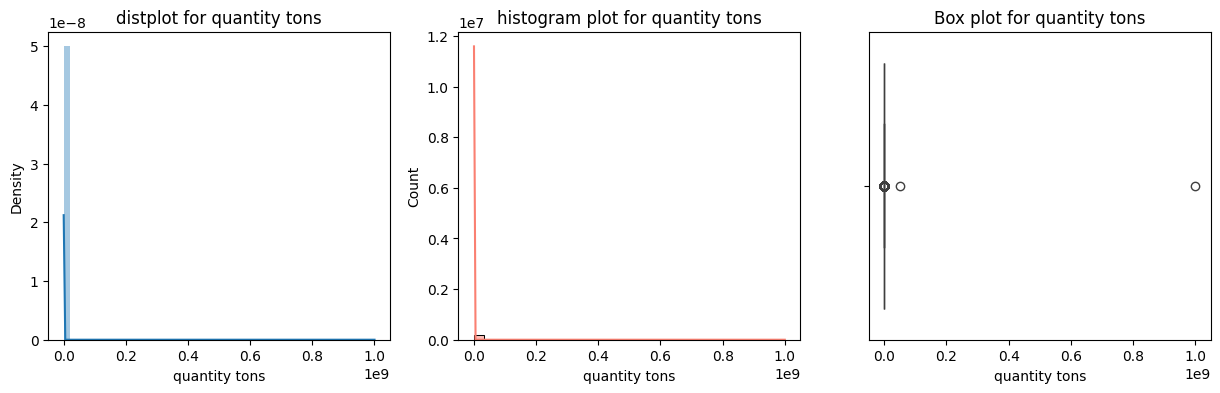

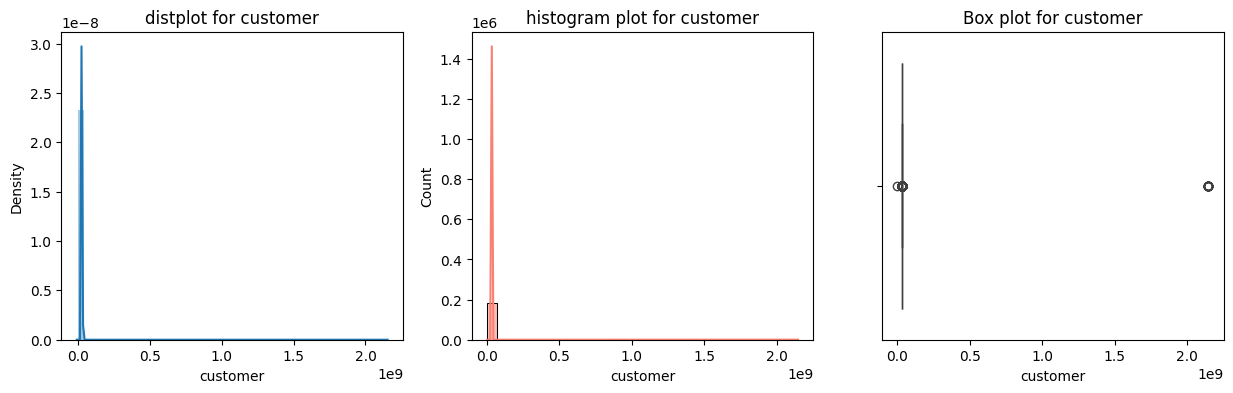

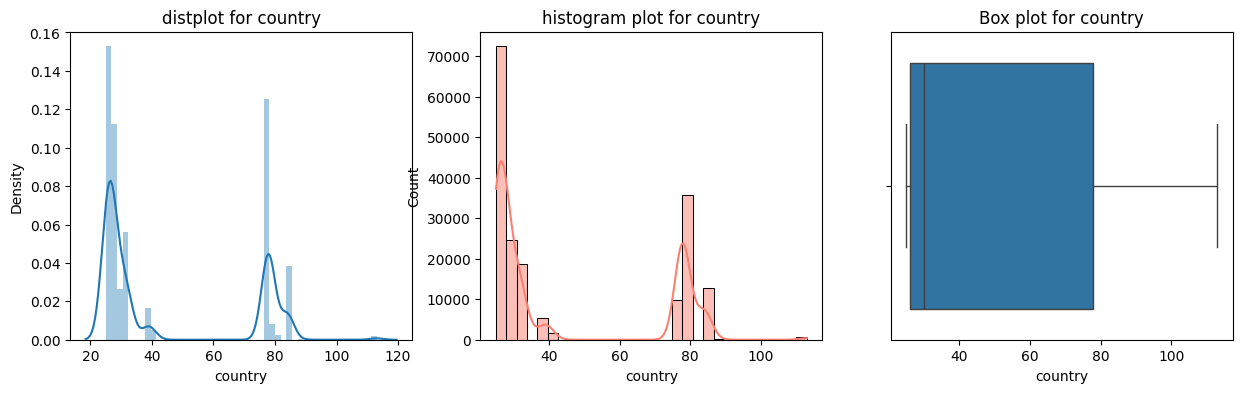

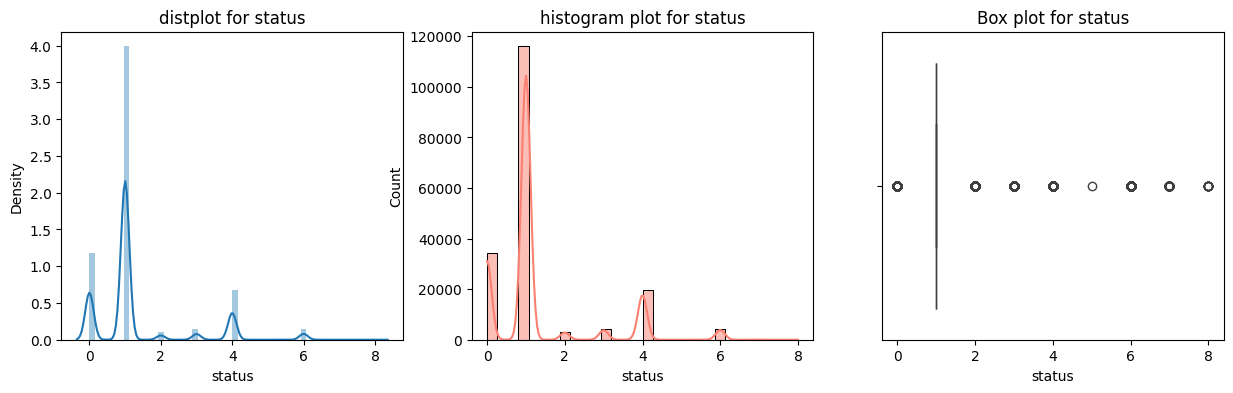

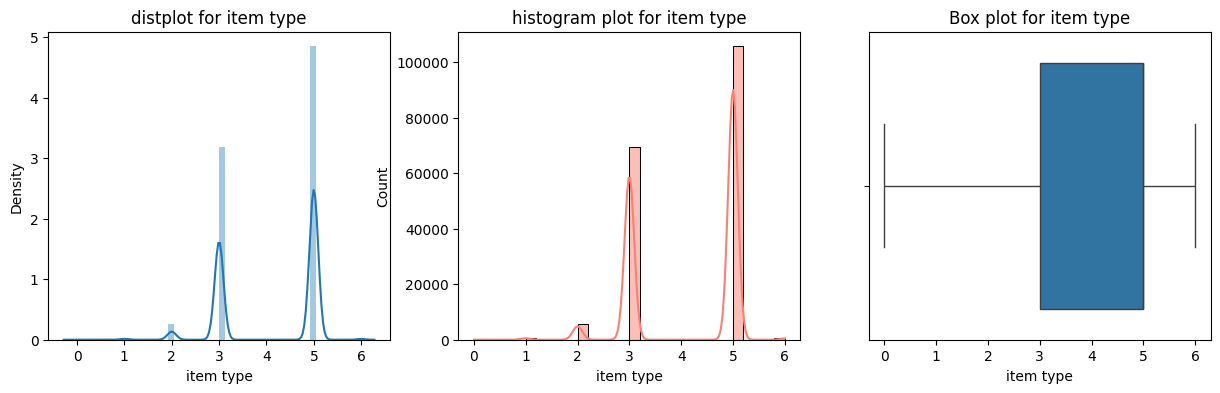

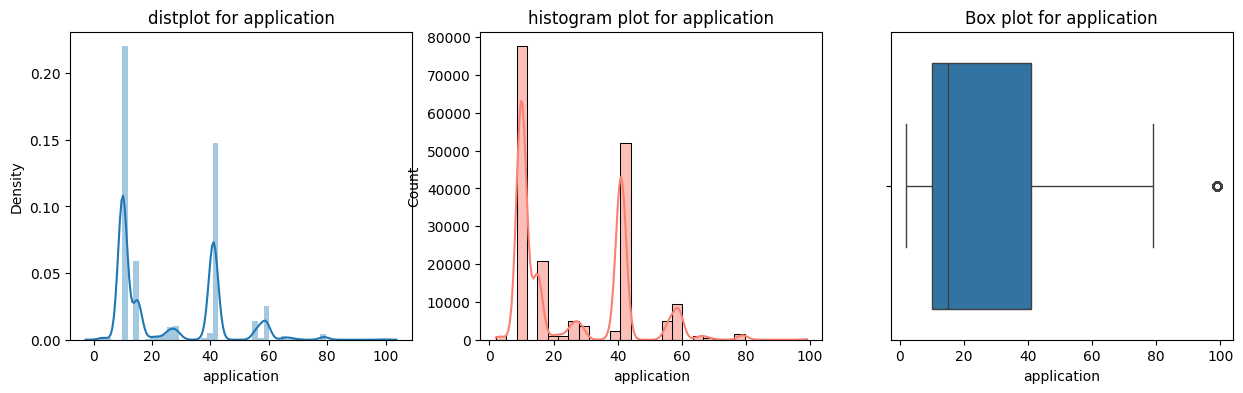

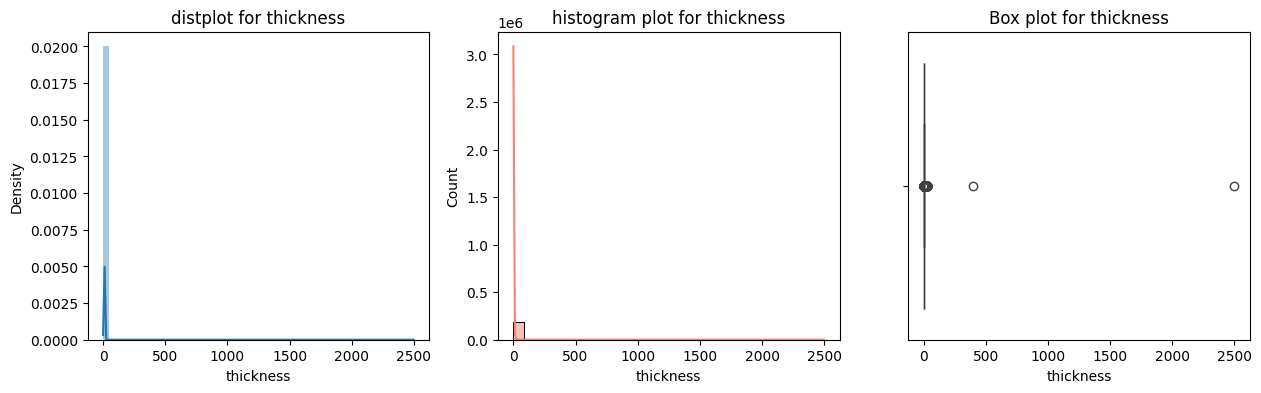

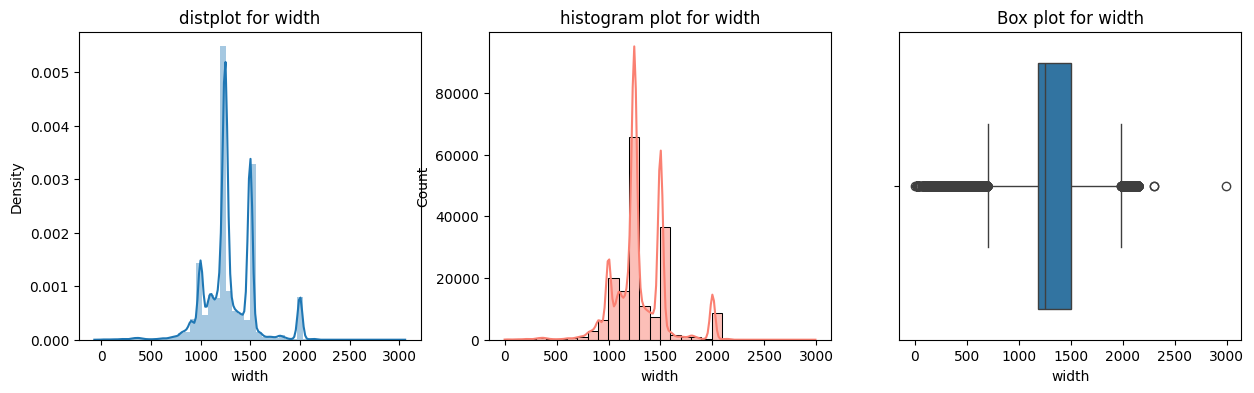

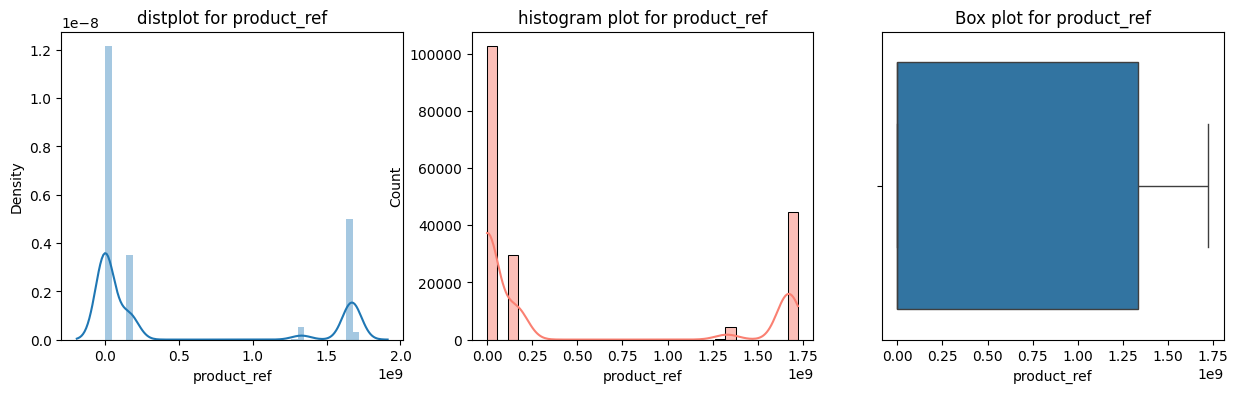

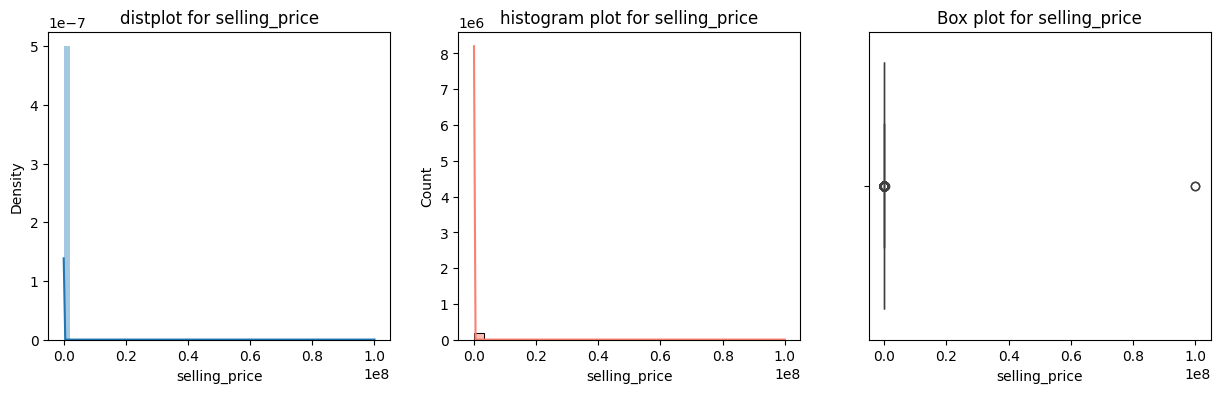

In [ ]:
for i in skewed_columns:
    plot(df, i)

In [ ]:
#Skewed columns:
# 1.quantity tons
# 2.customer
# 3.thickness
# 4.selling_price

In [ ]:
df_1 = df.copy()

In [ ]:
df_1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery_date_1'],
      dtype='object')

In [ ]:
df_1["quantity_tons_log"]= np.log(df_1["quantity tons"])
df_1["customer_log"]= np.log(df_1["customer"])
df_1["thickness_log"]= np.log(df_1["thickness"])
df_1["selling_price_log"]= np.log(df_1["selling_price"])

In [ ]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,30.365013,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


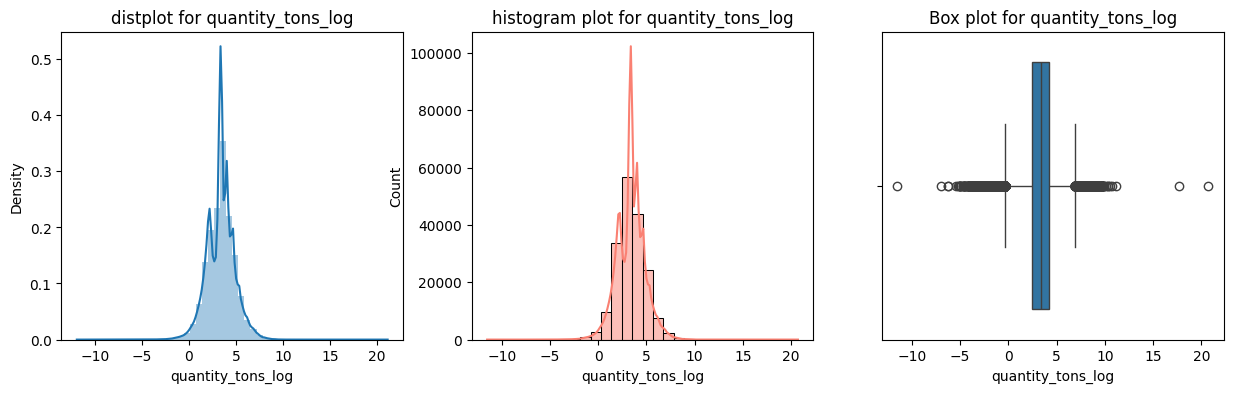

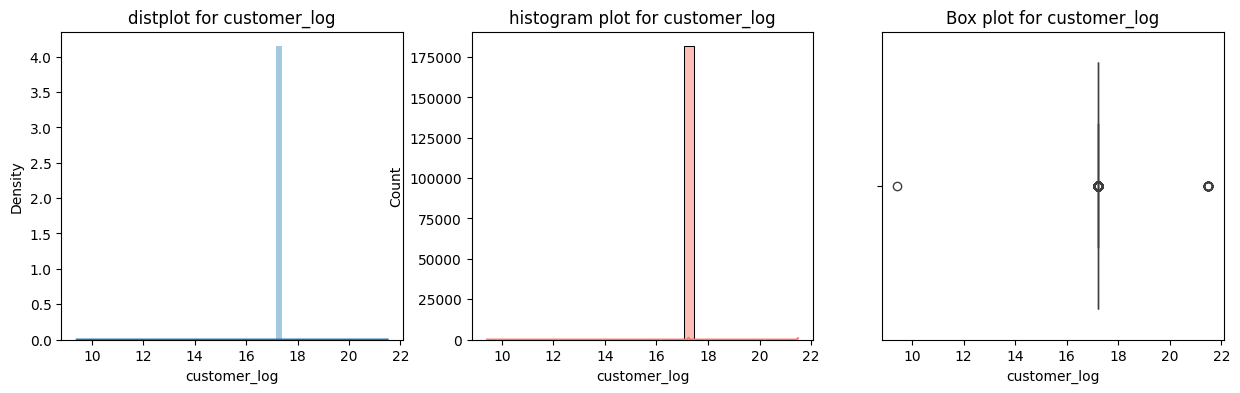

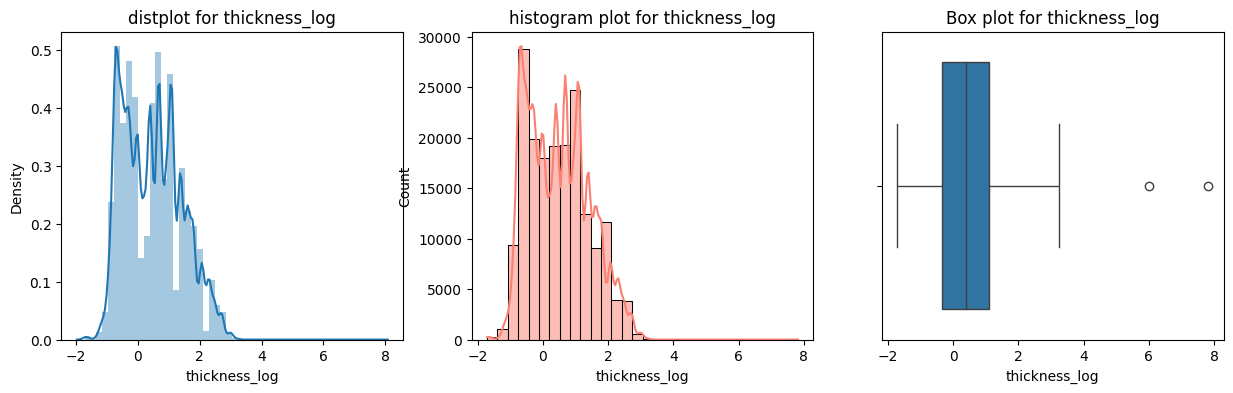

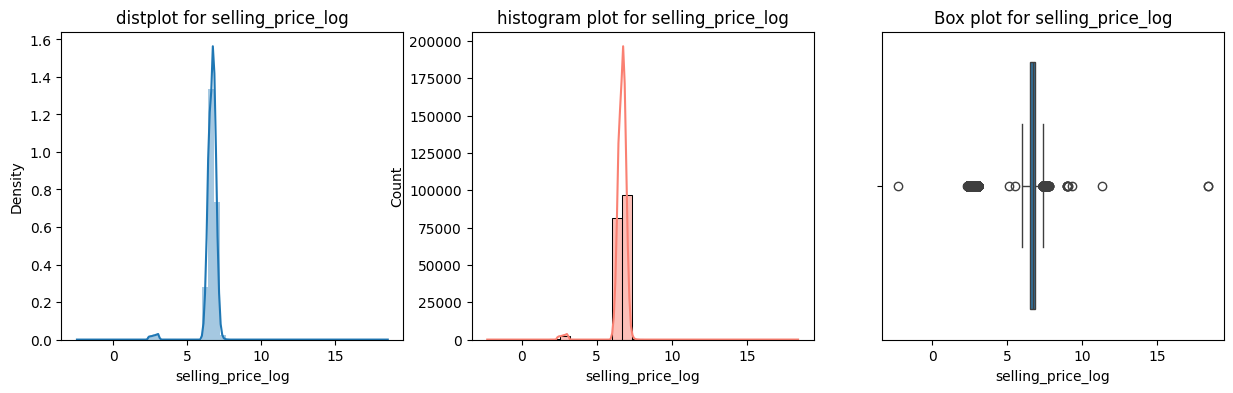

In [ ]:
skwed_columns_1=["quantity_tons_log","customer_log","thickness_log","selling_price_log"]
for i in skwed_columns_1:
  plot(df_1,i)

### Outliers Handling - Interquartile Range(IQR) Method

In [ ]:
df_2= df_1.copy()

In [ ]:
df_2.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [ ]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

(Ex: lower threshold = 5 and upper threshold = 20)

above upper threshold values (>20) are converted to upper threshold value (20) in features

below lower threshold values (<5)  are converted to lower threshold value (5)  in features

In [ ]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [ ]:
df_2.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log'],
      dtype='object')

In [ ]:
outlier_columns= ['quantity_tons_log', 'customer_log', 'thickness_log','selling_price_log','width','application']
for i in outlier_columns:
  outlier(df_2,i)

In [ ]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.560516e+01,1.771817e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,8.750000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.297046e+03,2.489619e+02,7.000000e+02,1.180000e+03,1.250000e+03,1.500000e+03,1.980000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


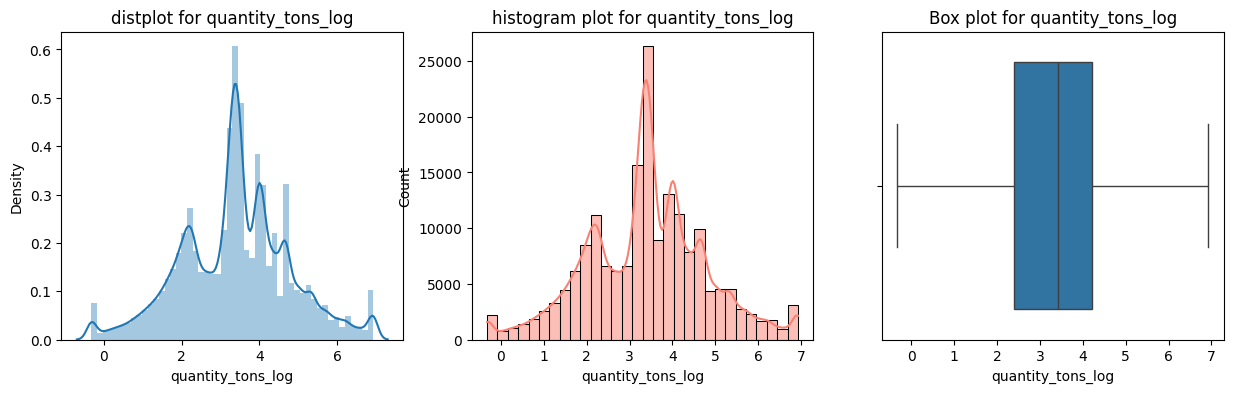

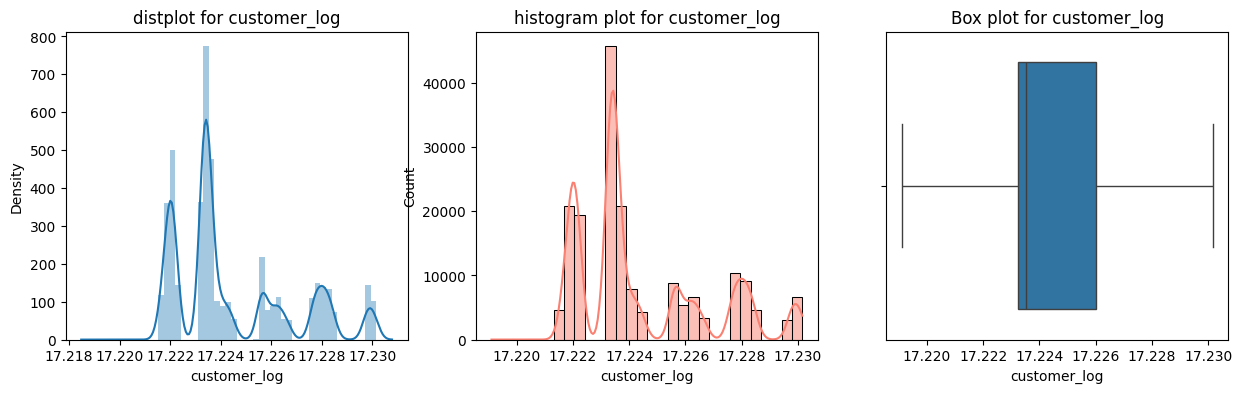

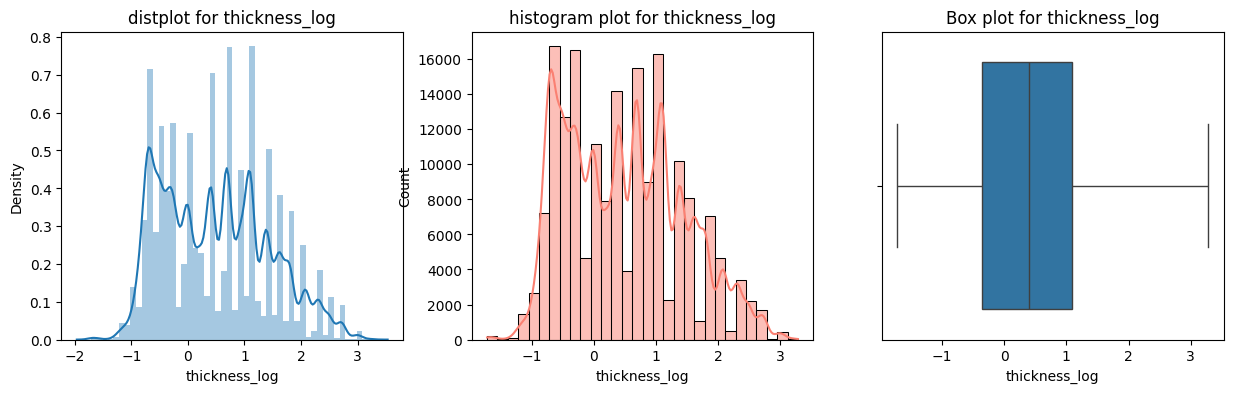

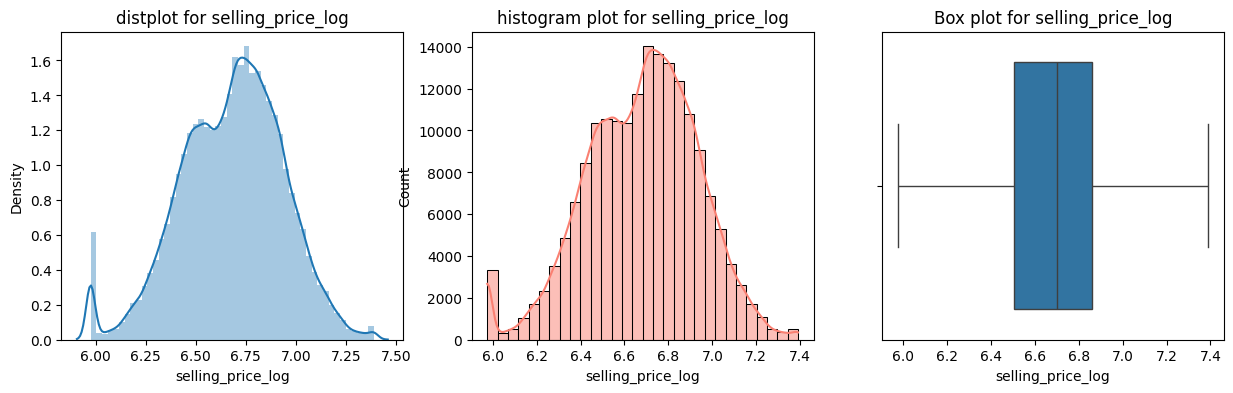

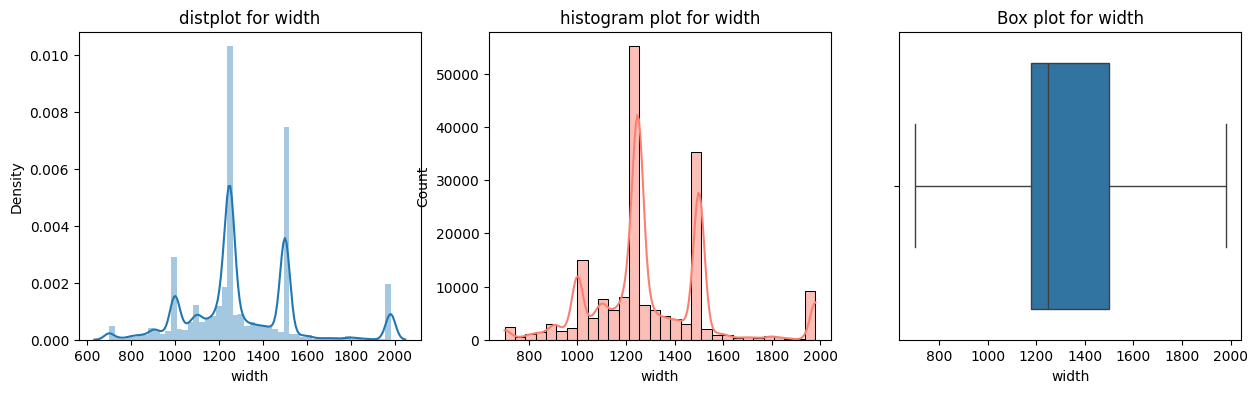

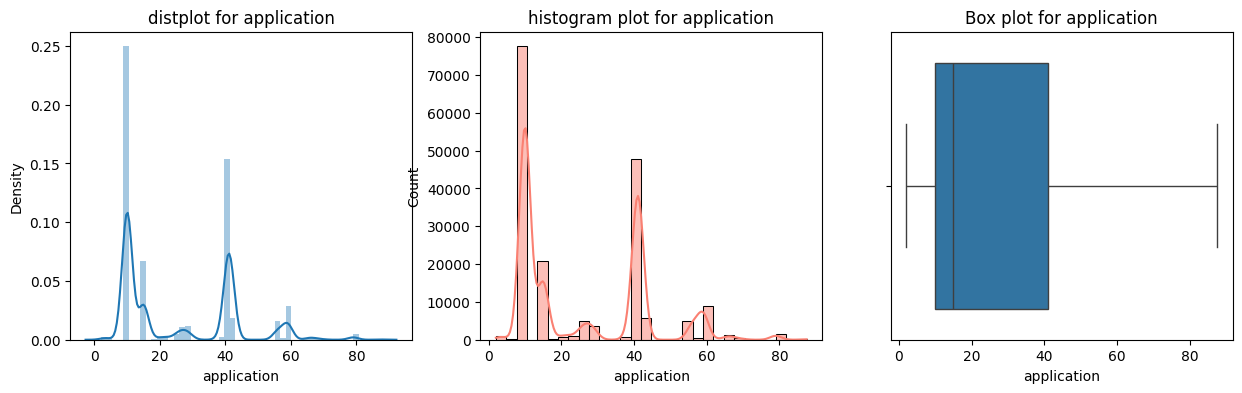

In [ ]:
for i in outlier_columns:
  plot(df_2,i)

In [ ]:
#Droping the unwanted skewed columns
#Skewed columns:
# 1.quantity tons
# 2.customer
# 3.thickness
# 4.selling_price

df_3= df_2.drop(columns=["quantity tons","customer","thickness","selling_price"])

In [ ]:
df_3

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816
181669,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426
181670,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105
181671,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595


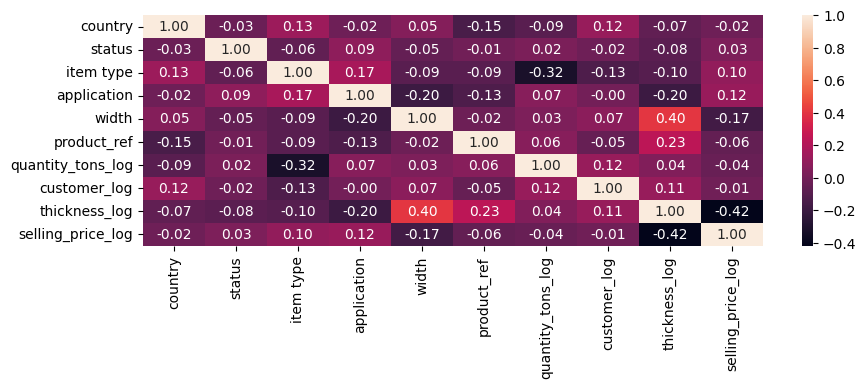

In [ ]:
#Checking the correlation with using the heatmap

corr= df_3.drop(columns=["item_date","delivery date","item_date_1","delivery_date_1"]).corr()
plt.figure(figsize=(10,3))
sns.heatmap(corr, annot= True, fmt="0.2f")
plt.show()

In [ ]:
# the high correlations are "-0.42", "0.40", "-0.32", "-0.20","0.23"

### **Wrong delivery date handling using ML prediction**

In [ ]:
df_4 = df_3.copy()

In [ ]:
df_4.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [ ]:
df_4.dtypes

item_date            float64
country              float64
status                 int64
item type            float64
application          float64
width                float64
product_ref            int64
delivery date        float64
item_date_1           object
delivery_date_1       object
quantity_tons_log    float64
customer_log         float64
thickness_log        float64
selling_price_log    float64
dtype: object

In [ ]:
df_4.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log'],
      dtype='object')

In [ ]:
#converting the datatype (object to datetime format)
df_4["delivery_date_1"]= pd.to_datetime(df_4["delivery_date_1"])
df_4["item_date_1"]= pd.to_datetime(df_4["item_date_1"])

In [ ]:
#identifying the difference of the "delivery date" and the "item date"
df_4["date_differ"]= (df_4["delivery_date_1"]-df_4["item_date_1"]).dt.days

In [ ]:
df_4['date_differ']

0         91
1          0
2        -90
3        -90
4        -31
          ..
181668    -1
181669    -1
181670    -1
181671    -1
181672    -1
Name: date_differ, Length: 181673, dtype: int64

In [ ]:
df_4.dtypes

item_date                   float64
country                     float64
status                        int64
item type                   float64
application                 float64
width                       float64
product_ref                   int64
delivery date               float64
item_date_1          datetime64[ns]
delivery_date_1      datetime64[ns]
quantity_tons_log           float64
customer_log                float64
thickness_log               float64
selling_price_log           float64
date_differ                   int64
dtype: object

some values have a negative values

it's mean the "delivery date provides , the previous date then the "item date"

so this is not possible , so we want to predic the delivery date for the some datas

In [ ]:
#creating the another 3 columns using the "item_date_1"
# it is usefull for the delivery date prediction
df_4["item_date_day"]= df_4["item_date_1"].dt.day
df_4["item_date_month"]= df_4["item_date_1"].dt.month
df_4["item_date_year"]= df_4["item_date_1"].dt.year

In [ ]:
df_4

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211,-90,1,4,2021
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790,-90,1,4,2021
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842,-31,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816,-1,2,7,2020
181669,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426,-1,2,7,2020
181670,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105,-1,2,7,2020
181671,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595,-1,2,7,2020


In [ ]:
#separating the posive values(pv) dataframe and negative values(nv) dataframe based on the "date_differ" column
df_4_pv= df_4[df_4["date_differ"]>=0]
df_4_pv.reset_index(drop= True, inplace= True)

In [ ]:
df_4_pv

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021
2,20210401.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,5.419608,17.223450,0.405465,6.890609,0,1,4,2021
3,20210401.0,30.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01,1.259203,17.223667,-0.967584,5.975038,91,1,4,2021
4,20210401.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01,4.235147,17.228025,-0.510826,7.217443,91,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165560,20200702.0,25.0,0,3.0,15.0,1980.0,640665,20200801.0,2020-07-02,2020-08-01,3.472467,17.224270,1.791759,6.313548,30,2,7,2020
165561,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.196171,17.222079,1.348073,6.126869,30,2,7,2020
165562,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.156686,17.222079,1.766442,6.124683,30,2,7,2020
165563,20200702.0,30.0,0,3.0,10.0,1500.0,640665,20200801.0,2020-07-02,2020-08-01,4.025862,17.222079,2.060514,6.126869,30,2,7,2020


In [ ]:
df_4_nv= df_4[df_4["date_differ"]<0]
df_4_nv.reset_index(drop= True, inplace= True)

In [ ]:
df_4_nv

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
0,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211,-90,1,4,2021
1,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790,-90,1,4,2021
2,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842,-31,1,4,2021
3,20210401.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.730808,17.228050,-0.385662,6.836259,-90,1,4,2021
4,20210401.0,32.0,1,5.0,41.0,1220.0,611993,20210101.0,2021-04-01,2021-01-01,4.736160,17.228050,-0.597837,6.860664,-90,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816,-1,2,7,2020
16104,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426,-1,2,7,2020
16105,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105,-1,2,7,2020
16106,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595,-1,2,7,2020


In [ ]:
# now we want to create the model for delivery date prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
df_4_pv.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'date_differ', 'item_date_day', 'item_date_month',
       'item_date_year'],
      dtype='object')

In [ ]:
df_4_nv.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'date_differ', 'item_date_day', 'item_date_month',
       'item_date_year'],
      dtype='object')

In [ ]:
#Find the best algorithm for the "delivery date" prediction

def accuracy_date_prediction(df, algorithm):
  x= df.drop(columns=["item_date_1", "delivery_date_1", "date_differ"])
  y= df["date_differ"]

  #train and test splitting
  x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)

  model= algorithm().fit(x_train,y_train)
  y_pred= model.predict(x_test)

  #checking the accuracy score
  mse= mean_squared_error(y_test, y_pred)
  rmse= np.sqrt(mse)
  mae= mean_absolute_error(y_test,y_pred)
  r2= r2_score(y_test, y_pred)

  metrics={"R2_score":r2,
           "Mean_squared_error":mse,
           "Root_mean_squared_error":rmse,
           "Mean_absolute_error":mae,
           }
  return metrics

In [ ]:
print(accuracy_date_prediction(df_4_pv,DecisionTreeRegressor))
print(accuracy_date_prediction(df_4_pv,RandomForestRegressor))
print(accuracy_date_prediction(df_4_pv,ExtraTreesRegressor))
print(accuracy_date_prediction(df_4_pv,GradientBoostingRegressor))
print(accuracy_date_prediction(df_4_pv,AdaBoostRegressor))
print(accuracy_date_prediction(df_4_pv,XGBRegressor))

{'R2_score': 0.9972845239299463, 'Mean_squared_error': 4.2130281158457406, 'Root_mean_squared_error': np.float64(2.052566226908584), 'Mean_absolute_error': 0.01431461963579259}
{'R2_score': 0.9971971303854269, 'Mean_squared_error': 4.348618137891464, 'Root_mean_squared_error': np.float64(2.0853340590637903), 'Mean_absolute_error': 0.01643825687796335}
{'R2_score': 0.9992942362500409, 'Mean_squared_error': 1.0949838794431186, 'Root_mean_squared_error': np.float64(1.0464147740944403), 'Mean_absolute_error': 0.01658442303626978}
{'R2_score': 0.9878957737618541, 'Mean_squared_error': 18.779559880583477, 'Root_mean_squared_error': np.float64(4.333538955701619), 'Mean_absolute_error': 2.9479455992502968}
{'R2_score': 0.7234799317774908, 'Mean_squared_error': 429.01752472226366, 'Root_mean_squared_error': np.float64(20.7127382236696), 'Mean_absolute_error': 17.348429034163903}
{'R2_score': 0.999013364315033, 'Mean_squared_error': 1.530784249305725, 'Root_mean_squared_error': np.float64(1.2372

Random Forest algorithm is low bias and reduce overfitting compared to others.

In [ ]:
# RandomForest Model

def RandomForest(train_df, test_df):

  x= train_df.drop(columns=["item_date_1", "delivery_date_1", "date_differ"])
  y= train_df["date_differ"]

  #train test splitting
  x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
  model= RandomForestRegressor().fit(x_train, y_train)

  data= test_df.drop(columns=["item_date_1", "delivery_date_1", "date_differ"])

  y_pred=model.predict(data)

  return y_pred


In [ ]:
date_difference= RandomForest(df_4_pv,df_4_nv)
date_difference

array([17.32, 17.33,  0.  , ..., 30.  , 30.  , 30.  ], shape=(16108,))

In [ ]:
# changing the "date_differ" datatype float into int
date_difference_1= []
for i in date_difference:
  dd = int(round(i,0))
  date_difference_1.append(dd)

In [ ]:
df_4_nv["date_differ"]= pd.DataFrame(date_difference_1)

In [ ]:
df_4_nv.isnull().sum()

item_date            0
country              0
status               0
item type            0
application          0
width                0
product_ref          0
delivery date        0
item_date_1          0
delivery_date_1      0
quantity_tons_log    0
customer_log         0
thickness_log        0
selling_price_log    0
date_differ          0
item_date_day        0
item_date_month      0
item_date_year       0
dtype: int64

In [ ]:
#find the delivery date using "item_date_1" and "date_differ"

def find_delivery_date(item_date, date_differ):
  date= item_date + pd.to_timedelta(date_differ,unit= "D")
  return date

In [ ]:
df_4_nv["delivery_date_1"]= find_delivery_date(df_4_nv["item_date_1"],df_4_nv["date_differ"])

In [ ]:
# Concadinating the two dataframes(df_4_pv,df_4_nv) based on the rows
final_df=pd.concat([df_4_pv,df_4_nv],axis=0,ignore_index=True)

In [ ]:
final_df.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
181668,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,17.223381,-0.040822,6.381816,30,2,7,2020
181669,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,17.223381,-0.051293,6.378426,30,2,7,2020
181670,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,17.223381,-0.342490,6.428105,30,2,7,2020
181671,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.413291,17.223381,-0.162519,6.398595,30,2,7,2020
181672,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-08-01,6.008043,17.223381,-0.342490,6.408529,30,2,7,2020


In [ ]:
# Now we create the three new columns using the "delivery_date_1"
final_df['delivery_date_day']= final_df["delivery_date_1"].dt.day
final_df['delivery_date_month']= final_df["delivery_date_1"].dt.month
final_df['delivery_date_year']= final_df["delivery_date_1"].dt.year

In [ ]:
final_df.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,...,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,...,17.221905,0.693147,6.749931,91,1,4,2021,1,7,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,...,17.223450,-0.223144,6.953684,0,1,4,2021,1,4,2021
2,20210401.0,25.0,1,5.0,41.0,1265.0,1668701718,20210401.0,2021-04-01,2021-04-01,...,17.223450,0.405465,6.890609,0,1,4,2021,1,4,2021
3,20210401.0,30.0,2,5.0,41.0,1125.0,611993,20210701.0,2021-04-01,2021-07-01,...,17.223667,-0.967584,5.975038,91,1,4,2021,1,7,2021
4,20210401.0,38.0,1,3.0,10.0,1275.0,1668701376,20210701.0,2021-04-01,2021-07-01,...,17.228025,-0.510826,7.217443,91,1,4,2021,1,7,2021


In [ ]:
final_df.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'date_differ', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [ ]:
# Droping the unwanted columns
final_df.drop(columns=["item_date","delivery date","item_date_1","delivery_date_1","date_differ"],inplace=True)

In [ ]:
final_df.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [ ]:
# Saveing the dataframe
#final_df.to_csv("Industrial_Copper_Final_DF.csv",index= False)

In [5]:
import pandas as pd

In [6]:
# Reading the saved "csv" file
final_df= pd.read_csv("Industrial_Copper_Final_DF.csv")

This DataFrame don't have any null values and catagorical columns

so our dataset is ready to the ML prediction

In [7]:
final_df

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,6.749931,1,4,2021,1,7,2021
1,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,17.223450,-0.223144,6.953684,1,4,2021,1,4,2021
2,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,17.223450,0.405465,6.890609,1,4,2021,1,4,2021
3,30.0,2,5.0,41.0,1125.0,611993,1.259203,17.223667,-0.967584,5.975038,1,4,2021,1,7,2021
4,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,17.228025,-0.510826,7.217443,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,25.0,1,5.0,41.0,1220.0,164141591,4.629691,17.223381,-0.040822,6.381816,2,7,2020,1,8,2020
181669,25.0,1,5.0,41.0,1500.0,164141591,5.337954,17.223381,-0.051293,6.378426,2,7,2020,1,8,2020
181670,25.0,1,5.0,41.0,1250.0,164141591,1.443523,17.223381,-0.342490,6.428105,2,7,2020,1,8,2020
181671,25.0,1,5.0,41.0,1250.0,164141591,3.413291,17.223381,-0.162519,6.398595,2,7,2020,1,8,2020


### **Classification Method - Predict (Won/Lose)**

In [8]:
#packages
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.combine import SMOTETomek

import pickle

In [9]:
classification_df = final_df.copy()

In [10]:
# filter the status column only want to be a (won & loss)
class_DF = classification_df[(classification_df["status"] == 1) | (classification_df["status"] == 0)]
class_DF.tail()

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
181668,25.0,1,5.0,41.0,1220.0,164141591,4.629691,17.223381,-0.040822,6.381816,2,7,2020,1,8,2020
181669,25.0,1,5.0,41.0,1500.0,164141591,5.337954,17.223381,-0.051293,6.378426,2,7,2020,1,8,2020
181670,25.0,1,5.0,41.0,1250.0,164141591,1.443523,17.223381,-0.342490,6.428105,2,7,2020,1,8,2020
181671,25.0,1,5.0,41.0,1250.0,164141591,3.413291,17.223381,-0.162519,6.398595,2,7,2020,1,8,2020
181672,25.0,1,5.0,41.0,1240.0,164141591,6.008043,17.223381,-0.342490,6.408529,2,7,2020,1,8,2020


In [11]:
class_DF['status'].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

This is a imbalanced data

so we want to resampling the data by usin the "SMOTETomek"

In [12]:
class_DF.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [13]:
x= class_DF.drop(columns=["status"],axis=1)
y= class_DF["status"]

In [14]:
x.shape, y.shape

((150450, 15), (150450,))

In [15]:
x_new,y_new= SMOTETomek().fit_resample(x,y)


In [16]:
y_new.value_counts()

status
1    115062
0    115062
Name: count, dtype: int64

In [17]:
x_new.shape,y_new.shape

((230124, 15), (230124,))

In [18]:
y_new.value_counts()

status
1    115062
0    115062
Name: count, dtype: int64

now the data is balanced

so, we continue the ML prediction

In [19]:
# find the best algorithm for the classification prediction

def accuracy_checking(x_data, y_data, algorithm):
  #train test splitting
  x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size= 0.2, random_state=42)

  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  #checking the accuracy_score
  accuracy_train= accuracy_score(y_train, y_pred_train)
  accuracy_test= accuracy_score(y_test, y_pred_test)

  metrics={"Algorithm": algorithm.__name__,
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
  return metrics

In [20]:
print(accuracy_checking(x,y,DecisionTreeClassifier))
print(accuracy_checking(x,y,RandomForestClassifier))
print(accuracy_checking(x,y,ExtraTreesClassifier))
print(accuracy_checking(x,y,AdaBoostClassifier))
print(accuracy_checking(x,y,GradientBoostingClassifier))
print(accuracy_checking(x,y,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9508142239946826}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9701229644400133}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9738783649052841}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.7909936856098372, 'Accuracy_Test': 0.7884679295446992}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8352027251578598, 'Accuracy_Test': 0.8334662678630774}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9461199734130941, 'Accuracy_Test': 0.9325689597873048}


In [21]:
print(accuracy_checking(x_new,y_new,DecisionTreeClassifier))
print(accuracy_checking(x_new,y_new,RandomForestClassifier))
print(accuracy_checking(x_new,y_new,ExtraTreesClassifier))
print(accuracy_checking(x_new,y_new,AdaBoostClassifier))
print(accuracy_checking(x_new,y_new,GradientBoostingClassifier))
print(accuracy_checking(x_new,y_new,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9632156436719175}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.981835958718088}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9849864204236828}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.7321658455504918, 'Accuracy_Test': 0.7336664856056491}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8207431870895551, 'Accuracy_Test': 0.8175991309071157}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9541713969114444, 'Accuracy_Test': 0.9471156979902227}


we got good accuracy after oversampling

ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.

so we want the reduce the overfitting.

RandomForestClassifier is good interpretability, so i select the algorithm

In [24]:
# Get the high accuracy using Hyperparameter Tuning method with using of the GridsearchCV

x_train, x_test, y_train, y_test= train_test_split(x_new,y_new, test_size= 0.2, random_state=42)

# parameters= {"max_depth": [2,5,10,20],                     #   this code consume more time because totally 108 combinatiobs
#              "min_samples_split": [2,5,10],
#              "min_samples_leaf": [1,2,4],
#              "max_features": ['sqrt', 'log2', None]}

parameters = {                                               #    16 combination only
    "max_depth": [5, 10],  # Reduce the number of depths
    "min_samples_split": [2, 5],  # Reduce options
    "min_samples_leaf": [1, 2],  
    "max_features": ['sqrt', 'log2']
}

gridsearch= GridSearchCV(estimator= RandomForestClassifier(), param_grid= parameters, cv= 5, n_jobs= -1)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [25]:
gridsearch.cv_results_

{'mean_fit_time': array([45.45936828, 45.86841474, 43.40635462, 43.72172918, 44.24138513,
        46.01113672, 46.22814822, 43.88239522, 77.66501403, 77.07253575,
        75.93734064, 75.43306351, 75.94643025, 77.09180636, 72.89427905,
        51.16803079]),
 'std_fit_time': array([1.26869489, 1.77328511, 2.44167734, 2.10812442, 2.41511639,
        1.53476923, 1.11807925, 1.85405531, 1.21551687, 1.15160472,
        1.45152402, 1.47931135, 1.30465871, 1.59202631, 4.53482157,
        9.4266213 ]),
 'mean_score_time': array([0.65670872, 0.69582577, 0.63232198, 0.7430326 , 0.70129995,
        0.71028156, 0.68725557, 0.69128995, 1.28070621, 1.27591667,
        1.22495165, 1.19771962, 1.26319366, 1.24911575, 1.1065742 ,
        0.57032566]),
 'std_score_time': array([0.07477447, 0.06033947, 0.04374353, 0.09119949, 0.0549503 ,
        0.04281947, 0.04583916, 0.05351065, 0.07109667, 0.07246937,
        0.08420393, 0.04974954, 0.06633082, 0.12735979, 0.24221342,
        0.10546906]),
 'param_ma

In [26]:
gridsearch.best_score_

np.float64(0.8811780532330603)

In [27]:
gridsearch.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Passing the best Hypertuning paramers in the ,

RandomForest algorithm and check the accuracy for training and testing

In [28]:
x_train, x_test, y_train, y_test= train_test_split(x_new, y_new, test_size= 0.2, random_state= 42)

model= RandomForestClassifier(max_depth=20, max_features= None, min_samples_leaf=1, min_samples_split=2).fit(x_train,y_train)

y_pred_train= model.predict(x_train)
y_pred_test= model.predict(x_test)

#checking the accuracy_score for train and test

accuracy_train= accuracy_score(y_train, y_pred_train)
accuracy_test= accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)
print("  ")
#confution matrics and the classification report for test

print("Confution_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true= y_test, y_pred= y_pred_test))
print(" ")
print("Classification_report for Test")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))

Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.9858934594973356
Accuracy_Test:  0.9694731124388919
  
Confution_matrix for Test
--------------------------
[[22616   370]
 [ 1035 22004]]
 
Classification_report for Test
-------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     22986
           1       0.98      0.96      0.97     23039

    accuracy                           0.97     46025
   macro avg       0.97      0.97      0.97     46025
weighted avg       0.97      0.97      0.97     46025



In [ ]:
# now the training accuracy overfitting reduced. so now model will predict effectively for unseen data

In [29]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold= roc_curve(y_true= y_test, y_score=y_pred_test)
print(threshold)
print(FP)
print(TP)
print(" ")
auc_curve= auc(x=FP,y=TP)
print("auc_curve:",auc_curve)

[inf  1.  0.]
[0.         0.01609675 1.        ]
[0.         0.95507618 1.        ]
 
auc_curve: 0.9694897103174844


In [45]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

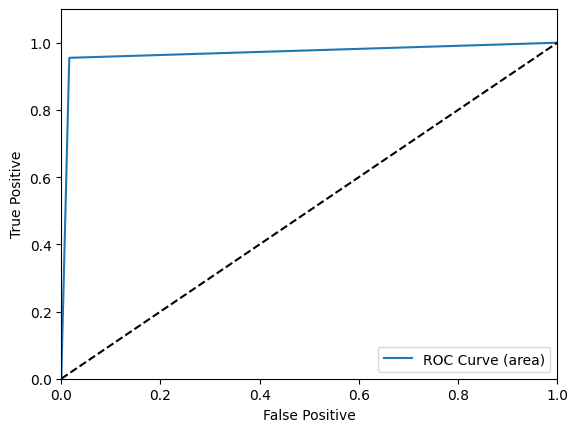

In [35]:
# create a plot for roc and auc curve
roc_point= {"ROC Curve (area)":round(auc_curve,2)}
plt.plot(FP,TP,label= roc_point)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()

In [38]:
user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1,4,2021,1,1,2021]])
y_pred_user= model.predict(user_data)
if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Won


In [39]:
#saving the model using the pickle

with open("Classification_model.pkl","wb") as f:
    pickle.dump(model,f)

In [41]:
with open("Classification_model.pkl","rb") as f1:
  class_model= pickle.load(f1)

In [42]:
user_data = np.array([[77.0,3.0,10.0,1500.0,164141591,3.677655,17.222226,0.000000,7.110696,1,4,2021,1,8,2021]])
y_pred_user= class_model.predict(user_data)

if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Lose


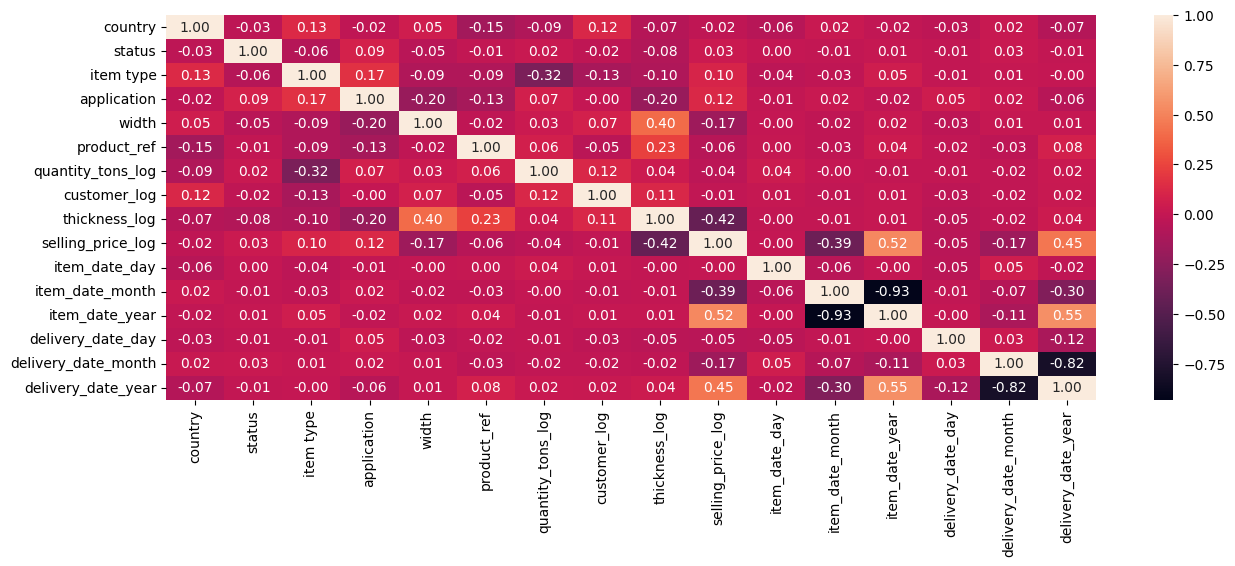

In [46]:
corr= final_df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr,annot= True, fmt="0.2f")
plt.show()

## **Regression Method - Predict the Selling Price**

In [47]:
#packages

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [50]:
regression_df = final_df.copy()

In [51]:
regression_df

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,6.749931,1,4,2021,1,7,2021
1,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,17.223450,-0.223144,6.953684,1,4,2021,1,4,2021
2,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,17.223450,0.405465,6.890609,1,4,2021,1,4,2021
3,30.0,2,5.0,41.0,1125.0,611993,1.259203,17.223667,-0.967584,5.975038,1,4,2021,1,7,2021
4,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,17.228025,-0.510826,7.217443,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,25.0,1,5.0,41.0,1220.0,164141591,4.629691,17.223381,-0.040822,6.381816,2,7,2020,1,8,2020
181669,25.0,1,5.0,41.0,1500.0,164141591,5.337954,17.223381,-0.051293,6.378426,2,7,2020,1,8,2020
181670,25.0,1,5.0,41.0,1250.0,164141591,1.443523,17.223381,-0.342490,6.428105,2,7,2020,1,8,2020
181671,25.0,1,5.0,41.0,1250.0,164141591,3.413291,17.223381,-0.162519,6.398595,2,7,2020,1,8,2020


In [52]:
#Find the best ML model to predict the selling price

def accuracy_regressor(df,algorithm):

  x= df.drop(columns=["selling_price_log"], axis=1)
  y= df["selling_price_log"]

  #train test splitting
  x_train,x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  r2_train= r2_score(y_train, y_pred_train)
  r2_test= r2_score(y_test, y_pred_test)

  metrics={"Algorithm":algorithm.__name__,
           "R2_Train": r2_train,
           "R2_Test": r2_test}

  return metrics

In [54]:
print(accuracy_regressor(regression_df, DecisionTreeRegressor))
print(accuracy_regressor(regression_df, RandomForestRegressor))
print(accuracy_regressor(regression_df, ExtraTreesRegressor))
print(accuracy_regressor(regression_df, AdaBoostRegressor))
print(accuracy_regressor(regression_df, GradientBoostingRegressor))
print(accuracy_regressor(regression_df, XGBRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2_Train': 0.9999206991163908, 'R2_Test': 0.9260247096339418}
{'Algorithm': 'RandomForestRegressor', 'R2_Train': 0.9939884814606171, 'R2_Test': 0.9571394267945527}
{'Algorithm': 'ExtraTreesRegressor', 'R2_Train': 0.9999206991163908, 'R2_Test': 0.9550288728330348}
{'Algorithm': 'AdaBoostRegressor', 'R2_Train': 0.6154293326871437, 'R2_Test': 0.6155044298134951}
{'Algorithm': 'GradientBoostingRegressor', 'R2_Train': 0.8865406163999165, 'R2_Test': 0.8870666530942815}
{'Algorithm': 'XGBRegressor', 'R2_Train': 0.952689979774145, 'R2_Test': 0.9470229243861625}


ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.

RandomForestClassifier is good interpretability, so i select the algorithm

In [55]:
x= regression_df.drop(columns=["selling_price_log"], axis=1)
y= regression_df["selling_price_log"]

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)

# parameters_r= {"max_depth": [2,4,10,20],
#                "min_samples_split": [2,5,10],
#                "min_samples_leaf": [1,2,4],
#                "max_features": ["sqrt","log2",None]}

parameters_r = {
    "max_depth": [2, 4, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 4],
    "max_features": ["sqrt", "log2"]
}

gridsearch_r= GridSearchCV(estimator= RandomForestRegressor(), param_grid= parameters_r, cv= 5,n_jobs=-1)
gridsearch_r.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 5]})

In [56]:
gridsearch_r.cv_results_

{'mean_fit_time': array([ 7.34663329,  7.04222813,  7.93491831,  8.07642126,  8.51503797,
         8.66262555,  8.68551984,  8.81978631, 15.32518868, 15.43092413,
        15.41581483, 15.36613703, 15.79047709, 15.74652491, 14.80957026,
        13.97758021, 27.85129046, 30.60513611, 38.81086102, 42.23998523,
        41.37788548, 43.49334626, 45.29720302, 43.38083663, 87.90957961,
        78.67871146, 68.85748591, 67.67635679, 86.06832471, 76.89434171,
        64.57662239, 42.99295616]),
 'std_fit_time': array([0.33243895, 0.26665882, 0.87853231, 0.41535008, 0.22990791,
        0.34389393, 0.28580348, 0.25639271, 0.18953436, 0.28483186,
        0.25374703, 0.549774  , 0.63773727, 0.37274883, 0.32673794,
        0.3573102 , 0.24648256, 2.14103247, 5.06721216, 0.56256431,
        1.62748464, 1.86922227, 0.72648352, 0.58339506, 0.81712915,
        0.67939065, 1.43383917, 0.80963595, 0.68687915, 0.68123516,
        4.30187557, 8.18668793]),
 'mean_score_time': array([0.15927715, 0.14584732, 

In [57]:
gridsearch_r.best_score_

np.float64(0.9472240319763049)

In [58]:
gridsearch_r.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [59]:
# pass the parameters and check the accuracy for both training and testing & overfitting

x = regression_df.drop(columns=['selling_price_log'], axis=1)
y = regression_df['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model_r.predict(x_train)
y_pred_test = model_r.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9864623550433301, 0.9564221054541248)

In [60]:
#predict the selling price with hypertuning parameters and calculate the accuracy using metrics

x = regression_df.drop(columns=['selling_price_log'], axis=1)
y = regression_df['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model_r.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9564936645103408,
 'Mean Absolute Error': 0.03240096748862022,
 'Mean Squared Error': 0.0028645917300641247,
 'Root Mean Squared Error': np.float64(0.05352188085319989)}

In [61]:
user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]])
y_pred = model_r.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  7.15891386597515
Predicted selling price without Log:  1285.5139339560812


In [62]:
import pickle

In [ ]:
# with open("Regression_Model.pkl","wb") as r:
#   pickle.dump(model_r,r)

In [64]:
with open("Regression_Model.pkl","rb") as r1:
  regg_model=pickle.load(r1)

In [65]:
final_df

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,6.749931,1,4,2021,1,7,2021
1,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,17.223450,-0.223144,6.953684,1,4,2021,1,4,2021
2,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,17.223450,0.405465,6.890609,1,4,2021,1,4,2021
3,30.0,2,5.0,41.0,1125.0,611993,1.259203,17.223667,-0.967584,5.975038,1,4,2021,1,7,2021
4,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,17.228025,-0.510826,7.217443,1,4,2021,1,7,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,25.0,1,5.0,41.0,1220.0,164141591,4.629691,17.223381,-0.040822,6.381816,2,7,2020,1,8,2020
181669,25.0,1,5.0,41.0,1500.0,164141591,5.337954,17.223381,-0.051293,6.378426,2,7,2020,1,8,2020
181670,25.0,1,5.0,41.0,1250.0,164141591,1.443523,17.223381,-0.342490,6.428105,2,7,2020,1,8,2020
181671,25.0,1,5.0,41.0,1250.0,164141591,3.413291,17.223381,-0.162519,6.398595,2,7,2020,1,8,2020


In [66]:
user_data = np.array([[28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,1,4,2021,1,7,2021]])
y_pred = regg_model.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  6.881546294987556
Predicted selling price without Log:  974.131490444887
